# Showing radius on map

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/maxim75/data-visualization/blob/master/notebooks/Showing_radius_on_map.ipynb)

Following packages need to be installed to run example

In [35]:
!pip install geopandas
!pip install contextily

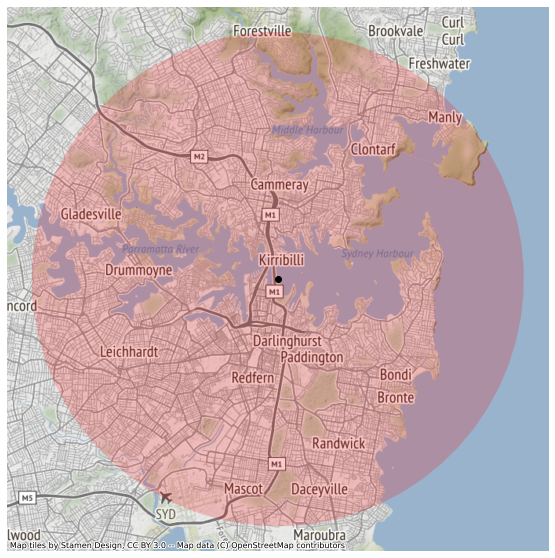

In [32]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

max_travel_distance_in_meters = 10000

# locations to show on map
locations_to_show_on_map = ["Sydney Opera House"]

# call nominatim geocoder to get location coordinates
my_home_location_df = gpd.tools.geocode(
    locations_to_show_on_map, provider='nominatim', 
    user_agent="maksym demo")

# get circle with 10 km radius 
my_travel_area = my_home_location_df.to_crs(epsg=20255).buffer(max_travel_distance_in_meters)

# plot home location and circle
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10,10))
my_travel_area.to_crs(epsg=3857).plot(ax=ax, color="#ff000033")
my_home_location_df.to_crs(epsg=3857).plot(ax=ax, color="#000000")

# show basemap using contextily
ctx.add_basemap(ax, zoom=12)
 
ax.set_axis_off()

In [28]:
my_home_location_df

,geometry,address
0,POINT (151.21512 -33.85720),"Sydney Opera House, 2, Macquarie Street, Sydne..."


In [29]:
my_travel_area

0    POLYGON ((899929.145 6245491.565, 899880.993 6...
dtype: geometry